Mini proyecto de regresion lineal | Examen Medio Curso | Redes Neuronales Artificiales

Autor: Alex Garcia Serna
Matricula:  1725239
Correo: alex.garciase@uanl.edu.mx
Github: github.com/AlexGarSer

Objetivo:
El mini proyecto consiste en desarrollar un algoritmo que recibe como entrada valores dados por el usuario de las variables de control seleccionadas como relevantes y devuelve al usuario el tiempo de producción esperado si se ajustan los controles con dichos valores dados.

La informacion utilizada para este proyecto al ser de caracter sensible se eliminaron los nombres de las columnas por razones de confidencialidad y se sustituyeron por "X" + "# de la columna".

In [1]:
# El dataset utilizado en este proyecto se encuentra nombrado como ProblemaRegresion.csv
# Este dataset fue otorgado por el instructor y para uso exclusivo del examen.

#Librerias a utlizar
from sklearn.neural_network import MLPClassifier
from os import urandom
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



#Primero se leen los datos del dataset y los pasamos a un dataframe para poder manipularlos.
datos = pd.read_csv("./Datos/ProblemaRegresion.csv")

Al darnos cuenta que faltaba informacion en el dataset y marcaba errrores al querer utilizarla decidimos utilizar los datos de media que teniamos actualmente para rellenar los espacios vacios.

In [2]:
#Se imprime la media de todas las columnas del dataframe
print(datos.mean())
print('\n'*3)

y       36.519935
x1      28.651091
x2      53.725729
x3      17.623180
x4      40.693215
x5      16.716437
x6      23.954144
x7       1.453853
x8     184.806763
x9     146.621576
x10    125.241155
x11    120.654717
x12     59.565670
x13    477.957222
x14     40.567198
x15     56.332647
x16      1.797769
x17     93.638739
x18      3.841009
x19     84.598280
x20     18.863547
x21      5.701706
x22     94.396895
x23      4.080073
x24     85.413006
x25      7.146739
x26     23.322593
x27     93.797414
x28      3.703272
x29     84.278472
x30     92.663914
x31      3.439937
x32     83.958096
x33     13.799972
x34      4.036723
dtype: float64






Una vez completados todos los datos, procedo a seccionar las salidas y las caracteristicas del dataset
donde Y representa las salidas esperadas y X son las caracteristicas

In [3]:
Y=datos[['y']] # se filtran la columna de salida esperada
print(Y[:5]) # Se imprime para corroborar que sean los datos esperados

print('\n'*3)

# Se filtran las columans que conformaran las caracteristicas
X = datos[['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24','x25','x26','x27','x28','x29','x30','x31','x32','x33','x34']] #Caracteristicas del conjunto
print(X[:5]) # Se imprime para corroborar que sean los datos esperados


           y
0  31.303077
1  32.520000
2  31.936000
3  31.822500
4  31.383636




          x1         x2         x3         x4         x5         x6        x7  \
0  23.403665  61.001078  15.595257  37.547146  16.806608  24.772692  1.497338   
1  20.864591  65.232089  13.903320  39.407843  16.170943  23.027157  1.425443   
2  21.788283  63.692885  14.518832  40.569120  15.907050  23.273360  1.470490   
3  24.315423  59.481762  16.202815  39.062450  16.688242  23.917008  1.448125   
4  24.649930  58.924352  16.425718  39.968936  16.013227  23.566355  1.483309   

           x8          x9         x10  ...       x25        x26   x27  x28  \
0  171.359231  144.714615  114.259231  ...  7.237142  23.714156  94.6  3.5   
1  176.830000  143.911429  119.740000  ...  5.811863  19.832235  94.6  3.7   
2  176.234000  146.550000  118.956000  ...  6.908267  16.987542  94.4  3.5   
3  174.932500  147.945833  116.710000  ...  0.931507   6.575342  93.8  3.4   
4  176.130000  147.524545  118.110909  ..

In [4]:
#Se imprime el dataframe
print(datos)

             y         x1         x2         x3         x4         x5  \
0    31.303077  23.403665  61.001078  15.595257  37.547146  16.806608   
1    32.520000  20.864591  65.232089  13.903320  39.407843  16.170943   
2    31.936000  21.788283  63.692885  14.518832  40.569120  15.907050   
3    31.822500  24.315423  59.481762  16.202815  39.062450  16.688242   
4    31.383636  24.649930  58.924352  16.425718  39.968936  16.013227   
..         ...        ...        ...        ...        ...        ...   
761  35.261250  26.110933  56.618658  17.270409  40.162700  17.288412   
762  34.576000  24.906090  58.625029  16.468882  42.486990  16.380330   
763  36.841000  26.603597  55.798247  17.598156  42.065450  16.348790   
764  36.717500  16.846006  72.047118  11.106877  42.785300  16.426838   
765  36.519935  28.651091  53.725729  17.623180  40.693215  16.716437   

            x6        x7          x8          x9  ...       x25        x26  \
0    24.772692  1.497338  171.359231  144.714

In [5]:
#Se imprime la cantidad de filas y columnas que tiene el datasframe
print(datos.shape)

(766, 35)


Para empezar a trabajar con los datos primero los pasaremos por una transformacion ya que algunos de los datos no son de las mismas magnitudes los pasaremos por una transformacion de centrado, escalado y normalizado, para ellos utilizaremos la libreria Sklearn con su funcion preprocessing.StandardScaler

In [6]:
scaler = preprocessing.StandardScaler()
datos=scaler.fit_transform(X)
print(scaler)

StandardScaler()


Una vez que ya tenemos los datos es hora de seccionar cuales de ellos seran utilizados para el entrenamiento de la red neuronal y cuales seran la comprobacion de que la red neuronal predice de manera correcta.

En este caso utilizaremos una proporcion 70%:30% para otorgar mas ejemplos de entrenamiento a la red neuronal que la que va a predecir.

Al ser 766 datos utilizaremos 536 que es el equivalente al 70% de los datos para el conjunto de entrenamiento y solo 230 para el conjunto de pruebas para corroborar el funcionamiento de la red neuronal.

In [7]:
#Division en conjunto de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

# Se imprime la cantidad de pruebas por cada set
print(x_train.shape) #Se imprime la cantidade columnas y filas a utilizar
print(x_test.shape) #Se imprime la cantidade columnas y filas a utilizar

#Estandar de conjuntos de entrenamiento y prueba
#x_train = StandardScaler().fit_transform(x_train)
#x_test = StandardScaler().fit_transform(x_test)

#print("Estandarizando...\n"*3)
#print("Estandarizado Completado!")

(536, 34)
(230, 34)


In [8]:

print("Entrenamiento X")
print(x_train[:5])

Entrenamiento X
            x1         x2         x3         x4         x5         x6  \
348  27.318950  56.134423  16.546627  40.066750  17.231910  23.232330   
377  38.158954  38.728812  23.112234  39.793390  17.181960  23.844520   
736  22.194462  63.140578  14.664960  40.976750  17.323850  23.666763   
111  19.716795  58.761086  21.522119  35.139364  18.433764  27.359927   
412  24.635511  59.187682  16.176807  43.582708  16.028725  22.266283   

           x7          x8          x9         x10  ...        x25        x26  \
348  1.355670  186.677000  151.290000  129.897000  ...   4.508956  21.494750   
377  1.408040  191.268000  149.522000  131.293000  ...   6.514503  27.532097   
736  1.375975  198.248750  144.480000  141.511250  ...   7.548807  25.292842   
111  1.507845  179.887273  150.482727  119.419091  ...  11.776650  30.659898   
412  1.390725  180.958333  144.489167  122.431667  ...   5.059848  17.192601   

      x27  x28   x29     x30   x31     x32        x33       x34 

Continuaremos aplicando ahora si la regresion lineal utilizando los datos de entrenamiento

In [9]:
#x_train = x_train.reshape([x_train.shape[0],1])
#x_test = x_test.reshape([x_test.shape[0],1])

In [10]:
regresion = linear_model.LinearRegression()
regresion.fit(x_train,y_train)
y_prediccion = regresion.predict(x_test)

In [13]:
print("Error: ", mean_squared_error(y_test,y_prediccion))
print("El valor de R cuadrada: ",r2_score(y_test,y_prediccion))

Error:  2487.140076613345
El valor de R cuadrada:  0.17954123163255253


ValueError: x and y must be the same size

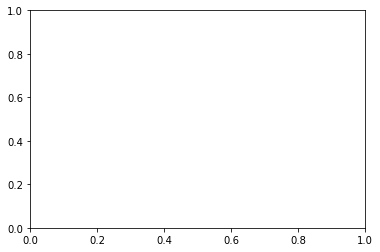

In [14]:
plt.scatter(x_train,y_train,color='green')
plt.scatter(x_test,y_prediccion,color='blue')

In [ ]:
#Entrenamiento del modeladoModelado
#clf = MLPClassifier(hidden_layer_sizes=(10,10,10), random_state=10, max_iter=10000)
#y_train = np.ravel(y_train)
#print(y_train)
#clf.fit(x_train, y_train)
#clf.predict_proba(x_test)
#clf.predict(x_test)
#clf.score(x_test, y_test)
##Evaluacion del modelado
#
#accuracy=round(clf.score(x_test, y_test),3)
#print("***Exactitud: ",accuracy,"***")
#
#
##Evaluacion del modelo
#y_pred = clf.predict(x_test)
#cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
#disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
#disp.plot(values_format = '')
#plt.show()